In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from collections import Counter
from ast import literal_eval
import itertools

In [2]:
# reading datasets
bb_usage = pd.read_csv("data/user_profile/BB_Usage_Categorical.csv")
voice_onnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Usage_Categorical.csv")
voice_onnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Usage_Categorical.csv")
voice_offnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Usage_Categorical.csv")
voice_offnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Usage_Categorical.csv")
voice_IDD_incoming_usage = pd.read_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")
voice_IDD_outgoing_usage = pd.read_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")
peo_tv_usage = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

In [3]:
# locations
bb_location = pd.read_csv("data/user_profile/BB_USAGE_Locations_of_Users.csv")
voice_onnet_incoming_location = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Locations_of_Users.csv")
voice_onnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Locations_of_Users.csv")
voice_offnet_incoming_location = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Locations_of_Users.csv")
voice_offnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Locations_of_Users.csv")
voice_IDD_incoming_location = pd.read_csv("data/user_profile/VOICE_IDD_INCOMING_Locations_of_Users.csv")
peo_tv_location = pd.read_csv("data/user_profile/PEO_TV_Locations_of_Users.csv")

In [4]:
# user demographics
demo_df = pd.read_csv("data/user_profile/user_demographics_final.csv")

In [5]:
# VAS
voice_agg_df = pd.read_csv("data/user_profile/VAS_Voice_Aggregated.csv")
bb_agg_df = pd.read_csv("data/user_profile/VAS_BB_Aggregated.csv")
peo_agg_df = pd.read_csv("data/user_profile/VAS_Peo_Aggregated.csv")
other_agg_df = pd.read_csv("data/user_profile/VAS_Other_Aggregated.csv")
free_agg_df = pd.read_csv("data/user_profile/VAS_FREE_Aggregated.csv")

In [6]:
# Subscription Types
sub_df = pd.read_csv("data/user_profile/User_Subscription_Map.csv")
promo_change_df = pd.read_csv("data/user_profile/User_Subscription_Changes.csv")

In [7]:
#Extra GB Usage BB
extra_GB_df = pd.read_csv("data/user_profile/BB_extra_GB_usage.csv")

In [8]:
# All customers reference
all_users_df = pd.read_csv("data/user_profile/account_no_map_reduced.csv")

# Data perapration

In [9]:
all_users_df.drop(["Unnamed: 0"],axis=1,inplace=True)
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  27555 non-null  object
 1   ACCOUNT_NUM.hash   27555 non-null  object
 2   CUSTOMER_REF.hash  27555 non-null  object
dtypes: object(3)
memory usage: 645.9+ KB


In [10]:
bb_usage.rename(columns={'Unnamed: 0':'event_source.hash'}, inplace="True")
bb_usage = bb_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#bb_usage.drop_duplicates("event_source.hash", inplace=True)
bb_usage.drop([0,1], axis=0, inplace=True)
# bb_usage

In [11]:
voice_onnet_incoming_usage = voice_onnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_incoming_usage

In [12]:
voice_onnet_outgoing_usage = voice_onnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_outgoing_usage

In [13]:
voice_offnet_incoming_usage = voice_offnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_offnet_incoming_usage

In [14]:
voice_offnet_outgoing_usage = voice_offnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_offnet_outgoing_usage

In [15]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier','incoming_country']]
voice_IDD_incoming_usage.rename(columns={"incoming_country":"IDD_incoming_country"}, inplace=True)
#voice_IDD_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_incoming_usage

In [16]:
voice_IDD_incoming_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   event_source.hash         1632 non-null   object 
 1   Usage_Rating_Categorical  1632 non-null   object 
 2   Usage_Rating_Scaled       1632 non-null   float64
 3   Outlier                   1632 non-null   object 
 4   IDD_incoming_country      1632 non-null   object 
dtypes: float64(1), object(4)
memory usage: 63.9+ KB


In [17]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier',"Revenue_on_Usage_Cumulative","outgoing_country"]]
voice_IDD_outgoing_usage.rename(columns={"outgoing_country":"IDD_outgoing_country","Revenue_on_Usage_Cumulative":"IDD_outgoing_Cumulative_Revenue"}, inplace=True)
#voice_IDD_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_outgoing_usage

In [18]:
voice_IDD_outgoing_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event_source.hash                517 non-null    object 
 1   Usage_Rating_Categorical         517 non-null    object 
 2   Usage_Rating_Scaled              517 non-null    float64
 3   Outlier                          517 non-null    object 
 4   IDD_outgoing_Cumulative_Revenue  517 non-null    int64  
 5   IDD_outgoing_country             517 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.4+ KB


In [19]:
peo_tv_usage = peo_tv_usage[['Phone_Number.hash','Peo_TV_Package','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#peo_tv_usage.drop_duplicates("Phone_Number.hash", inplace=True)
#peo_tv_usage

In [20]:
# user location 
print(bb_location.shape)
print(voice_onnet_incoming_location.shape)
print(voice_onnet_outgoing_location.shape)
print(voice_offnet_incoming_location.shape)
print(voice_offnet_outgoing_location.shape)
print(voice_IDD_incoming_location.shape)
print(peo_tv_location.shape)

(1306, 3)
(3236, 3)
(3307, 3)
(3329, 3)
(3191, 3)
(1632, 3)
(1428, 4)


In [21]:
# location from voice onnet outgoing
# justification: this has the max no of subscribers
voice_onnet_outgoing_location = voice_onnet_outgoing_location[['event_source.hash','Location_Identifier']]
voice_onnet_outgoing_location.drop_duplicates("event_source.hash", inplace=True)
#voice_onnet_outgoing_location

In [22]:
demo_df.drop(["Unnamed: 0"], axis=1,inplace=True)

# User Profile : Usage

In [23]:
usage_df = all_users_df.merge(voice_onnet_outgoing_usage,how='left', on='event_source.hash')

In [24]:
usage_df = usage_df.merge(voice_onnet_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical_x':'ONNET_OUTGOING_Categorical', 'Usage_Rating_Categorical_y':'ONNET_INCOMING_Categorical',
                         'Usage_Rating_Scaled_x':'ONNET_OUTGOING_Scaled','Usage_Rating_Scaled_y':'ONNET_INCOMING_Scaled',
                         'Outlier_x':'ONNET_OUTGOING_Outlier','Outlier_y':'ONNET_INCOMING_Outlier'}, inplace="True")

In [25]:
usage_df = usage_df.merge(voice_offnet_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'OFFNET_OUTGOING_Categorical','Usage_Rating_Scaled':'OFFNET_OUTGOING_Scaled', 'Outlier':'OFFNET_OUTGOING_Outlier'}, inplace="True")

In [26]:
usage_df = usage_df.merge(voice_offnet_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'OFFNET_INCOMING_Categorical','Usage_Rating_Scaled':'OFFNET_INCOMING_Scaled','Outlier':'OFFNET_INCOMING_Outlier'}, inplace="True")

In [27]:
usage_df = usage_df.merge(voice_IDD_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_INCOMING_Categorical','Usage_Rating_Scaled':'IDD_INCOMING_Scaled','Outlier':'IDD_INCOMING_Outlier'}, inplace="True")

In [28]:
usage_df = usage_df.merge(voice_IDD_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_OUTGOING_Categorical','Usage_Rating_Scaled':'IDD_OUTGOING_Scaled','Outlier':'IDD_OUTGOING_Outlier'}, inplace="True")

In [29]:
usage_df = usage_df.merge(peo_tv_usage,how='left', left_on='event_source.hash', right_on='Phone_Number.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'PEO_TV_Categorical','Usage_Rating_Scaled':'PEO_TV_Scaled'}, inplace="True")
usage_df.drop('Phone_Number.hash', axis=1, inplace=True)

In [30]:
# merege BB usage
usage_df = usage_df.merge(bb_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'BB_Categorical','Usage_Rating_Scaled':'BB_Scaled'}, inplace="True")

In [31]:
# merge user location identifier
usage_df = usage_df.merge(voice_onnet_outgoing_location,how='left', on='event_source.hash')

# Adding New Data

### Adding demographics

In [32]:
demo_df.drop(["CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [33]:
usage_df = usage_df.merge(demo_df,how='left', on='event_source.hash')

In [34]:
usage_df[["BIRTH_YEAR","AGE"]].describe()

,BIRTH_YEAR,AGE
count,4104.000000,4104.000000
mean,1964.109893,56.890107
std,15.177714,15.177714
min,1900.000000,20.000000
25%,1953.000000,45.000000
50%,1965.000000,56.000000
75%,1976.000000,68.000000
max,2001.000000,121.000000


<AxesSubplot:ylabel='Density'>

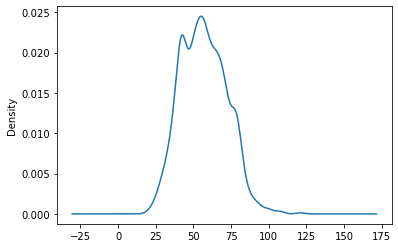

In [35]:
usage_df["AGE"].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

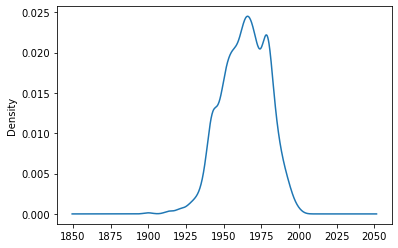

In [36]:
usage_df["BIRTH_YEAR"].plot(kind = 'density')

### Demographic Information

- 4104 users have demographic info (age, Birth Year, Gender)
- Users born from **1900**-2001 
- Age vary from 21 y.o. to **121 y.o**
- Mean Age - 56 y.o
- 75% of users are less than 68 y.o.
- Mostly middle aged, and aged customers

## Voice Usage Bins

In [37]:
usage_df["ONNET_INCOMING_Categorical"].value_counts()

LOW       1673
MEDIUM    1224
HIGH       145
Name: ONNET_INCOMING_Categorical, dtype: int64

In [38]:
def voice_bin(incoming,outgoing):
    if incoming=="LOW" and outgoing=="LOW":
        return "LOW"
    if incoming=="HIGH" and outgoing=="HIGH":
        return "HIGH"
    if (incoming=="HIGH" and outgoing=="MEDIUM") or (incoming=="MEDIUM" and outgoing=="HIGH"):
        return "HIGH"
    if incoming=="MEDIUM" and outgoing=="MEDIUM":
        return "MEDIUM"
    if (incoming=="MEDIUM" and outgoing=="LOW") or (incoming=="LOW" and outgoing=="MEDIUM"):
        return "LOW"
    if (incoming=="LOW" and outgoing=="HIGH") or (incoming=="HIGH" and outgoing=="LOW"):
        return "MEDIUM"
    if (isinstance(incoming,float) and not isinstance(outgoing,float)) or (not isinstance(incoming,float) and isinstance(outgoing,float)):
        return "LOW"
#     if (isinstance(incoming,float) and isinstance(outgoing,float)):
#         return "NO"

In [39]:
# test
voice_bin("LOW","HIGH")

'MEDIUM'

In [40]:
usage_df["ONNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["ONNET_INCOMING_Categorical"], x["ONNET_OUTGOING_Categorical"]), axis=1)

In [41]:
usage_df["OFFNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["OFFNET_INCOMING_Categorical"], x["OFFNET_OUTGOING_Categorical"]), axis=1)

In [42]:
usage_df["IDD_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["IDD_INCOMING_Categorical"], x["IDD_OUTGOING_Categorical"]), axis=1)

In [43]:
def voice_overall_bin(call_usage):
    counts = Counter(call_usage)
    if counts["LOW"] > 1:
        return "LOW"
    elif counts["HIGH"] > 1:
        return "HIGH"
    elif counts["MEDIUM"] > 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1:
        return "LOW"
    elif counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"

In [44]:
# test
voice_overall_bin(["HIGH","HIGH","NO"])

'HIGH'

In [45]:
usage_df["VOICE_Categorical"] = usage_df.apply(lambda x: voice_overall_bin([x["ONNET_Overall_Categorical"], x["OFFNET_Overall_Categorical"], x["IDD_Overall_Categorical"]]), axis=1)

In [46]:
usage_df[(usage_df["VOICE_Categorical"] == "NO")]

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,...,BB_Categorical,BB_Scaled,Location_Identifier,GENDER,BIRTH_YEAR,AGE,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical


## Subscrition Types

In [47]:
sub_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [48]:
usage_df = usage_df.merge(sub_df,how='left',on=["event_source.hash"])

In [49]:
def check_product_level(voice,bb,tv):
    if not isinstance(voice,float): 
        if bb=="NO" and tv=="NO":
            return "SINGLE_PLAY"
        if bb != "NO" and tv == "NO":
            return "DOUBLE_PLAY_BV"
        if bb == "NO" and tv != "NO":
            return "DOUBLE_PLAY_PV"
        if bb != "NO" and tv != "NO":
            return "TRIPLE_PLAY"

In [50]:
# test
check_product_level("LOW","HIGH","NO")

'DOUBLE_PLAY_BV'

In [51]:
usage_df["Play_Type"] = usage_df.apply(lambda x: check_product_level(x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]), axis=1)

In [52]:
# play usage
def play_usage(usage):
    if len(usage)>2:
        new_usage=[]
        for el in usage:
            if isinstance(el,float) or el=="nan" or el==None:
                new_usage.append("NO_INFO")
            else:
                new_usage.append(el)
        return [f"VOICE_{new_usage[0]}", f"BB_{new_usage[1]}", f"TV_{new_usage[2]}"]
    else:
        return "ERR"

In [53]:
# test
play_usage(["LOW","HIGH","LOW"])

['VOICE_LOW', 'BB_HIGH', 'TV_LOW']

In [54]:
usage_df["Sub_Usage"] = usage_df.apply(lambda x: play_usage([x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]]), axis=1)

In [55]:
usage_df[["Sub_Type","Play_Type"]].value_counts()

Sub_Type        Play_Type     
DOUBLE_PLAY_BV  TRIPLE_PLAY       9088
DOUBLE_PLAY_PV  TRIPLE_PLAY       6623
SINGLE_PLAY     TRIPLE_PLAY       2291
TRIPLE_PLAY     TRIPLE_PLAY       2096
4G              TRIPLE_PLAY        102
SINGLE_PLAY     DOUBLE_PLAY_BV      28
DOUBLE_PLAY_BV  DOUBLE_PLAY_BV      27
TRIPLE_PLAY     DOUBLE_PLAY_BV      19
DOUBLE_PLAY_PV  DOUBLE_PLAY_BV      12
dtype: int64

In [56]:
def check_sub_type(sub):
    if isinstance(sub, float):
        return "Assumed"
    else:
        return "Actual"

In [57]:
usage_df["Sub_Type_State"]=usage_df["Sub_Type"].apply(lambda x: check_sub_type(x))

In [58]:
def merge_sub_types(sub1,sub2):
    if isinstance(sub1, float):
        return sub2
    else:
        return sub1

In [59]:
usage_df["Sub_Type"] = usage_df.apply(lambda x: merge_sub_types(x["Sub_Type"], x["Play_Type"]), axis=1)

In [60]:
usage_df.drop(["Play_Type"],axis=1,inplace=True)

In [61]:
usage_df["Sub_Type_State"].value_counts()

Actual     20286
Assumed     7269
Name: Sub_Type_State, dtype: int64

In [62]:
usage_df["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    9251
TRIPLE_PLAY       9248
DOUBLE_PLAY_PV    6635
SINGLE_PLAY       2319
4G                 102
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

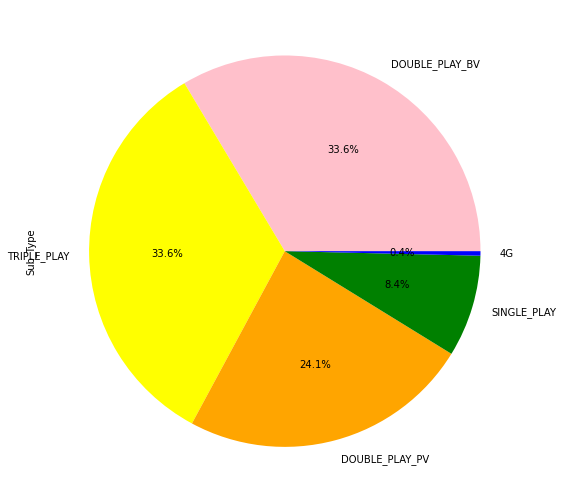

In [63]:
usage_df["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', colors=['pink','yellow','orange','green','blue'])

### Note

- Actual Subscription information - for **20286** Subscribers
- Assumed on usage - **7269**

### Wait! Contradiction??

In [64]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

LOW       18
HIGH       2
MEDIUM     1
Name: BB_Categorical, dtype: int64

In [65]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

LOW       22
HIGH       6
MEDIUM     5
Name: BB_Categorical, dtype: int64

In [66]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

NO        28
MEDIUM     6
LOW        6
HIGH       4
Name: PEO_TV_Categorical, dtype: int64

In [67]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

NO        163
HIGH        6
MEDIUM      5
LOW         3
Name: PEO_TV_Categorical, dtype: int64

### Why??
- These subscribers may have used the services within 2019-01 to 2021-01 and however downgraded thier services by the time of BSS dataset has generated

### Dropping contradictory subscribers

In [68]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV") & (usage_df["BB_Categorical"].notna())].index)

In [69]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [70]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["BB_Categorical"].notna())].index)

In [71]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [72]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [73]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

NO    22
Name: PEO_TV_Categorical, dtype: int64

In [74]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [75]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

NO    163
Name: PEO_TV_Categorical, dtype: int64

In [76]:
usage_df["Sub_Type"].value_counts()

TRIPLE_PLAY       9248
DOUBLE_PLAY_BV    9237
DOUBLE_PLAY_PV    6614
SINGLE_PLAY       2273
4G                 102
Name: Sub_Type, dtype: int64

## Service Packages and VAS
- categories derived from "Product State Changes" and "VAS" datasets

In [77]:
voice_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
bb_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
peo_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
other_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
free_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [78]:
usage_df = usage_df.merge(voice_agg_df,how='left', on='event_source.hash')

In [79]:
usage_df = usage_df.merge(bb_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(peo_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(free_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(other_agg_df,how='left', on='event_source.hash')
usage_df.drop(['VAS_Count_x','VAS_Count_y'], axis=1, inplace=True)

## Subscription upgrades and Downgrades

In [80]:
promo_change_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [81]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  19648 non-null  object
 1   Sub_Update_Date    19648 non-null  object
 2   Sub_Update_Status  19648 non-null  object
 3   Sub_Update         19648 non-null  object
dtypes: object(4)
memory usage: 614.1+ KB


In [82]:
usage_df = usage_df.merge(promo_change_df,how='left', on='event_source.hash')

In [83]:
usage_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Upgrade    SINGLE_PLAY -> DOUBLE_PLAY_BV       8564
                     SINGLE_PLAY -> DOUBLE_PLAY_PV       6517
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       2022
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       1541
                     DOUBLE_PLAY_BV -> TRIPLE_PLAY        376
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        193
Promotion Upgrade    4G -> 4G                             102
Promotion Downgrade  TRIPLE_PLAY -> DOUBLE_PLAY_PV         95
Promotion Upgrade    SINGLE_PLAY -> TRIPLE_PLAY            80
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY            55
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV         24
Promotion Upgrade    DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV       1
dtype: int64

<AxesSubplot:ylabel='None'>

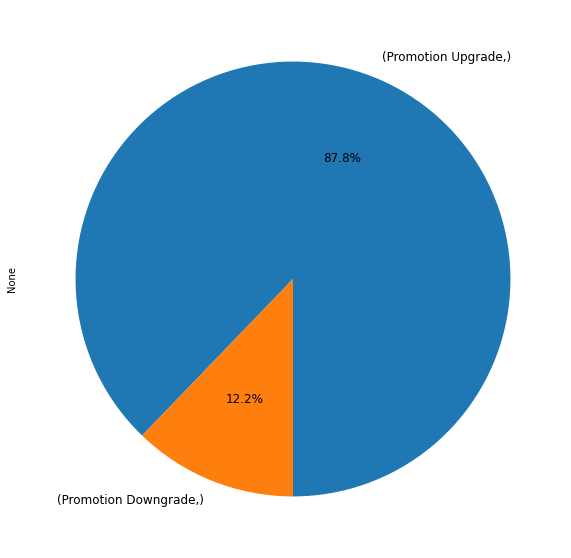

In [84]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
usage_df[["Sub_Update_Status"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12)

## BB Extra GB Purchased

In [85]:
extra_GB_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash","VAS"],axis=1, inplace=True)
extra_GB_df.rename(columns={"Month_Subscribed":"BB_Extra_GB_Purchased_Month","Rental":"BB_Extra_GB_Rental"}, inplace=True)

In [86]:
extra_GB_df["BB_Extra_GB_Purchased_Times"]= 1

In [87]:
extra_GB_agg_df = extra_GB_df.groupby('event_source.hash', as_index=False).agg(list)

In [88]:
extra_GB_agg_df['BB_Extra_GB_Purchased_Times'] = extra_GB_agg_df.apply(lambda x: len(x['BB_Extra_GB_Purchased_Times']), axis=1)

In [89]:
def list_zipper(list1,list2):
    return dict(zip(list1,list2))

In [90]:
extra_GB_agg_df['BB_Extra_GB_Month_vs_Rental'] = extra_GB_agg_df.apply(lambda x: list_zipper(x['BB_Extra_GB_Purchased_Month'],x['BB_Extra_GB_Rental']), axis=1)

In [91]:
extra_GB_agg_df.drop(["BB_Extra_GB_Purchased_Month","BB_Extra_GB_Rental"],axis=1, inplace=True)

In [92]:
scaler = MinMaxScaler()
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = scaler.fit_transform(extra_GB_agg_df["BB_Extra_GB_Purchased_Times"].values.reshape(-1,1))

In [93]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [94]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].describe()

count    21634.000000
mean         0.382297
std          0.321539
min          0.010000
25%          0.068966
50%          0.379310
75%          0.517241
max          1.000000
Name: BB_Extra_GB_Purchased_Scaled, dtype: float64

In [95]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_GB_agg_df['BB_Extra_GB_Purchase_Categorical'] = pd.cut(extra_GB_agg_df['BB_Extra_GB_Purchased_Scaled'], bins=bins, labels=labels)

In [96]:
extra_GB_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21634 entries, 0 to 21633
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   event_source.hash                 21634 non-null  object  
 1   BB_Extra_GB_Purchased_Times       21634 non-null  int64   
 2   BB_Extra_GB_Month_vs_Rental       21634 non-null  object  
 3   BB_Extra_GB_Purchased_Scaled      21634 non-null  float64 
 4   BB_Extra_GB_Purchase_Categorical  21634 non-null  category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 866.3+ KB


In [97]:
usage_df = usage_df.merge(extra_GB_agg_df,how='left', on='event_source.hash')

# Deriving Contextual Features

## Socio-Economic features

In [98]:
usage_df["Other_VAS_Package"].unique()

array(["['P-Basic1_Tele Life', 'C_Sisu Connect', 'AB_Copper Access Bearer', 'Edu Lite', 'Meet Lite', 'Meet Max']",
       "['AB_Copper Access Bearer', 'Meet Lite']",
       "['AB_Copper Access Bearer']",
       "['AB_Copper Access Bearer', 'Meet Max']", nan,
       "['P_Sisu Connect', 'AB_Copper Access Bearer']",
       "['P_Sisu Connect']",
       "['P-Basic1_Tele Life', 'P_Sisu Connect', 'AB_Copper Access Bearer', 'Meet Lite']",
       "['Meet Lite']",
       "['P-Plus1_Tele Life', 'AB_Copper Access Bearer']",
       "['AB_Copper Access Bearer', 'P_Sisu Connect', 'Edu Lite', 'Meet Lite']",
       "['P_Sisu Connect', 'AB_Copper Access Bearer', 'Edu Lite', 'Meet Lite']",
       "['P-Basic1_Tele Life', 'P_Sisu Connect', 'Meet Lite']",
       "['AB_Megaline Startup', 'AB_Megaline', 'AB_Copper Access Bearer']",
       "['P-Basic1_Tele Life', 'AB_Copper Access Bearer', 'Meet Lite']",
       "['P-Basic1_Tele Life', 'AB_Copper Access Bearer', 'E_TSTV']",
       "['AB_Copper Access Bearer', '

In [99]:
usage_df["Voice_VAS_Package"].unique()

array([nan, "['V_Sisu Connect']", "['V_E-channeling Registration']",
       "['V_SLT CLI', 'V_IDD', 'V_Single VAS Bundle']",
       "['V-Basic1_TeleLife']",
       "['V-Plus1_TeleLife', 'V_E-channeling Registration']", "['V_IDD']",
       "['V_SLT CLI', 'V_IDD']", "['V_Single VAS Bundle', 'V_SLT CLI']",
       "['V_SLT CLI', 'V_Single VAS Bundle']",
       "['V_Single VAS Bundle', 'V_IDD', 'V_SLT CLI']",
       "['V_IDD', 'V_Single VAS Bundle', 'V_SLT CLI']",
       "['V_IDD', 'V_SLT CLI', 'V_Single VAS Bundle']",
       "['V_SLT CLI', 'V_Double VAS Bundle', 'V_IDD']",
       "['V_Hotline Service', 'V_Single VAS Bundle', 'V_Hotline-Time Delayed', 'V_IDD', 'V_Hotline-Immediate', 'V_Caller Line Identification']",
       "['V_IDD', 'V_Single VAS Bundle', 'V_Hotline-Immediate', 'V_Hotline-Time Delayed', 'V_Caller Line Identification', 'V_Hotline Service']",
       "['V_Hotline-Immediate', 'V_Hotline Service', 'V_Hotline-Time Delayed']",
       "['V_Telehealth', 'V-Plus1_TeleLife', 'V_E-cha

In [100]:
usage_df["BB_VAS_Package"].unique()

array(["['BB_Report Subscription Charge', 'BB_YouTube Bundle', 'BB Personal Storage']",
       "['BB_Report Subscription Charge']", nan,
       "['BB_ Entertainment Unlimited', 'BB_YouTube Bundle', 'BB_Report Subscription Charge']",
       "['BB_Report Subscription Charge', 'BB_YouTube Bundle']",
       "['BB Personal Storage']",
       "['BB_Report Subscription Charge', 'BB_Messenger Bundle', 'BB_YouTube Bundle']",
       "['BB_ Entertainment Unlimited', 'BB_Report Subscription Charge']",
       "['BB_Messenger Bundle', 'BB_YouTube Bundle', 'BB_Report Subscription Charge']",
       "['BB_Messenger Bundle']", "['BB_ Entertainment Unlimited']",
       "['BB_ Entertainment Unlimited', 'BB_YouTube Bundle']",
       "['BB_Report Subscription Charge', 'BB Personal Storage']",
       "['BB_YouTube Bundle']",
       "['BB_ Entertainment Unlimited', 'BB Personal Storage']",
       "['BB_ Entertainment Unlimited', 'BB_Messenger Bundle', 'BB_YouTube Bundle', 'BB_Report Subscription Charge']",
  

In [101]:
usage_df["Peo_VAS_Package"].unique()

array([nan, "['PEO TV GO_OTT_A-la carte channels']",
       "['E_SLT PeoTV Service']", "['BB_PeoTVGO Revenue code']",
       "['E_Video on Demand']",
       "['E_SLT PeoTV Service', 'PEO TV GO_OTT_A-la carte channels']",
       "['E_SLT PeoTV Service', 'E_Video on Demand']",
       "['E_SLT PeoTV Service', 'BB_PeoTVGO Revenue code']",
       "['PeoTVGo_Channel Package']",
       "['E_Video on Demand', 'E_SLT PeoTV Service']",
       "['PEO TV GO_OTT_A-la carte channels', 'E_Video on Demand']",
       "['OTT_SLT PeoTV Go', 'PeoTVGo_Channel Package']",
       "['E_SLT PeoTV Service', 'OTT_SLT PeoTV Go', 'PEO TV GO_OTT_A-la carte channels', 'PeoTVGo_Channel Package']",
       "['E_Video on Demand', 'E_SLT PeoTV Service', 'PEO TV GO_OTT_A-la carte channels']",
       "['E_SLT PeoTV Service', 'OTT_SLT PeoTV Go', 'PEO TV GO_OTT_A-la carte channels', 'PeoTVGo_Channel Package', 'BB_PeoTVGO Revenue code']",
       "['BB_PeoTVGO']", "['BB_PeoTVGO', 'BB_PeoTVGO Revenue code']",
       "['BB_PeoTV

In [102]:
usage_df["FREE_VAS_Package"].unique()

array(["['V_SLT Voice Service']", nan,
       "['V_Abbreviated Dialing', 'V_Call Forwarding', 'V_Absentee service', 'V_Call Transfer Three way', 'V_Call Waiting', 'V_Call Forwarding-Immediate', 'V_Call Forwarding-On Busy', 'V_Call Forwarding-No Answer']",
       "['V_Absentee service', 'V_Call Transfer Three way', 'V_Abbreviated Dialing', 'V_Call Forwarding-Immediate', 'V_Call Forwarding-On Busy', 'V_Call Forwarding-No Answer', 'V_Call Forwarding', 'V_Call Waiting', 'V_DQ Contact Details', 'V_SLT Voice Service']",
       "['V_Call Forwarding', 'V_Call Waiting', 'V_Call Forwarding-No Answer', 'V_Call Transfer Three way', 'V_Call Forwarding-On Busy', 'V_Call Forwarding-Immediate', 'V_Absentee service', 'V_Abbreviated Dialing']",
       "['V_SLT Voice Service', 'V_Abbreviated Dialing', 'V_Call Transfer Three way', 'V_Call Waiting', 'V_Call Forwarding', 'V_Call Forwarding-Immediate', 'V_Call Forwarding-On Busy', 'V_Absentee service', 'V_Call Forwarding-No Answer']",
       "['V_Call Waitin

In [103]:
usage_df["Peo_TV_Package"].unique()

array([nan, 'PEO_SILVER', 'PEO_SILVER_PLUS', 'PEO_RELIGIOUS_PACKAGE',
       'NEW_SLT_STAFF_PACKAGE', 'PEO_UTHAYAM', 'PEO_TITANIUM',
       'PEO_UNNATHAM', 'PRANAMA', 'LOTUS', 'PEO_ENTERTAINMENT',
       'PEO_SILVER_PLUS_FTTH', 'SLTStaff_PEO_SILVER', 'PEO_PLATINUM',
       'DOUBLEPROMO', 'NEW_YEAR_TREAT', 'PEO_FAMILY', 'PEO_SILVER_FTTH',
       'BOC', 'PEO_GOLD', 'SLT_STAFF_PEO_UNNATHAM_FTTH',
       'SLT_STAFF_TRIPLE_PLAY'], dtype=object)

### Having an Insurance?

In [104]:
def having_insurance(other,voice):
    insurrence_VAS = ["V_Telehealth","V-Basic4_TeleLife","V-Plus4_TeleLife","V-Plus1_TeleLife","V-Basic1_TeleLife","P-Basic1_Tele Life","P-Plus1_Tele Life","P-Basic2_Tele Life","C-Basic1_Tele Life","P-Plus4_Tele Life"]
    if not isinstance(other,float) and not isinstance(voice,float):
        for vas in insurrence_VAS:
            if vas in other:
                return "YES"
            if vas in voice:
                return "YES"

In [105]:
usage_df["Having_Insurance"] = usage_df.apply(lambda x: having_insurance(x["Other_VAS_Package"],x["Voice_VAS_Package"]), axis=1)

### Household types
- Senior Citizen
  - Age > 55 years (demographics)
  - Peo_TV_Usage - High, Packages: PEO_RELIGIOUS_PACKAGE, PRANAMA
  - Voice call usage - high (in country, europian country, australia,US, canada)
  - Having Insurance: YES
- Kids at Home
  - Age > 30 years (assuming parents)
  - Peo TV Usage - High, packages: PEO_FAMILY, DOUBLEPROMO, PEO_TITANIUM, PEO_GOLD
  - Peo TV VAS: PeoTVGo_Channel Package (Extra Channels purchase)
  - BB Usage: Medium/ High
  - VAS - Sisu_Connect, Edu Lite
- Student (High school/University), Teenagers
  - Age < 27 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_ENTERTAINMENT, PEO_TITANIUM, DOUBLEPROMO, LEISURE_SPORTS
  - BB Usage - High **
  - Extra GB Purchase (High)
  - VAS - Meet Lite, Meet Max 
  - Peo TV VAS: E_Video_on_Demand
  - BB_VAS:  BB_YouTube Bundle, BB_ Entertainment Unlimited,  BB_Messenger Bundle
- Working Professional
  - Age > 22, < 55 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_FAMILY, SLT_STAFF_PEO_UNNATHAM_FTTH, SLT_STAFF_TRIPLE_PLAY, NEW_SLT_STAFF_PACKAGE, BOC
  - BB Usage - High **
  - Extra GB Purchase (all)
  - VAS - Meet Lite, Meet Max, AB_Service Vacation, AB_Referral offer Discount, AB_Citylink Loyalty Rewards
- Family Member Abroad
  - IDD Usage : High
  - IDD Calling Country : Europe/ UAE/ Australia/ Canada/ South and east Asia **
- Race: Tamil
   - Peo TV Usage - PEO_UNNATHAM, PEO_UTHAYAM, SLT_STAFF_PEO_UNNATHAM_FTTH
- Abroad person: country/ countries

## Adding Socio Feature Cols

In [106]:
def make_categorical(val):
    if val>=0.5:
        return "YES"

#### Having a Senior Citizen

In [107]:
def senior_citizen(age, peo_tv_cat, peo_tv_package, voice_call_cat, having_insurrance):
    prob = 0.0
    peo_packages = [ "PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if age>= 55:
        prob += 0.3
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    if voice_call_cat == "MEDIUM":
        prob += 0.1
    if voice_call_cat == "HIGH":
        prob += 0.2
    if having_insurrance == "YES":
        prob += 0.5
    return prob

In [108]:
# test
senior_citizen(56,"HIGH",["PEO_RELIGIOUS_PACKAGE"],"MEDIUM",None)

0.6

In [109]:
usage_df["Having_Senior_Citizen_Scaled"] = usage_df.apply(lambda x: senior_citizen(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["VOICE_Categorical"],x["Having_Insurance"]), axis=1)

In [110]:
usage_df["Having_Senior_Citizen"] = usage_df.apply(lambda x: make_categorical(x["Having_Senior_Citizen_Scaled"]), axis=1)

#### Having Kids at Home

In [111]:
def kids_at_home(age, peo_tv_cat, peo_tv_package, peo_tv_vas,bb_usage, voice_vas_package, vas):
    prob = 0.0
    peo_packages = ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    peo_vas = [ "PeoTVGo_Channel Package"]
    all_vas = ["C_Sisu Connect", "Edu Lite"]
    voice_vas = ["V_Sisu Connect"]
    if age>= 30:
        prob += 0.2
    if peo_tv_cat == "HIGH":
        prob += 0.25
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(peo_tv_vas, float):
            for pack in peo_vas:
                if pack in peo_tv_vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.5
    if not isinstance(voice_vas_package, float):
        for pack in voice_vas:
            if pack in voice_vas_package:
                prob += 0.5
    if bb_usage == "MEDIUM" or bb_usage == "HIGH":
        prob += 0.1
    return prob

In [112]:
# test
kids_at_home(25,"LOW",[],[],"LOW",[],["C_Sisu Connect"])

0.5

In [113]:
usage_df["Having_Kids_at_Home_Scaled"] = usage_df.apply(lambda x: kids_at_home(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["Peo_VAS_Package"],x["BB_Categorical"],x["Voice_VAS_Package"],x["Other_VAS_Package"]), axis=1)

In [114]:
usage_df["Having_Kids_at_Home"] = usage_df.apply(lambda x: make_categorical(x["Having_Kids_at_Home_Scaled"]), axis=1)

#### Teenagers and Students (age 16-26)

In [115]:
def teenage_students(age, peo_tv_cat, peo_tv_package,peo_vas_package, bb_cat, bb_vas_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = [ "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    peo_vas = [ "E_Video_on_Demand"]
    bb_vas = ["BB_YouTube Bundle", "BB_ Entertainment Unlimited", "BB_Messenger Bundle"]
    all_vas = ['Meet Lite', 'Meet Max']
    if age<= 26:
        prob += 0.3
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.2
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(peo_vas_package, float):
            for pack in peo_vas:
                if pack in peo_vas_package:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(bb_vas_package, float):
            for pack in bb_vas:
                if pack in bb_vas_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [116]:
# test
teenage_students(33,"HIGH",["PEO_SILVER_PLUS"],[],"MEDIUM",["BB_YouTube Bundle"],"HIGH",[])

0.8

In [117]:
usage_df["Having_Teenagers_Students_Scaled"] = usage_df.apply(lambda x: teenage_students(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["Peo_VAS_Package"],x["BB_Categorical"], x["BB_VAS_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Other_VAS_Package"]), axis=1)

In [118]:
usage_df["Having_Teenagers_Students"] = usage_df.apply(lambda x: make_categorical(x["Having_Teenagers_Students_Scaled"]), axis=1)

### Working Professionals

In [119]:
def working_professionals(age, peo_tv_cat, peo_tv_package, bb_cat, bb_vas_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    bb_vas = ["BB Personal Storage"]
    all_vas = ['Meet Lite', 'Meet Max','AB_Referral offer Discount', 'AB_Service Vacation','AB_Citylink Loyalty Rewards']
    if age> 21 and age<56:
        prob += 0.2
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.1
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(bb_vas_package, float):
            for pack in bb_vas:
                if pack in bb_vas_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.25
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [120]:
# test
working_professionals(33,"HIGH",["SLT_STAFF_TRIPLE_PLAY"],"MEDIUM",["BB Personal Storage"],"HIGH",[])

1.1

In [121]:
usage_df["Having_Working_Professionals_Scaled"] = usage_df.apply(lambda x: working_professionals(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"], x["BB_VAS_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Other_VAS_Package"]), axis=1)

In [122]:
usage_df["Having_Working_Professionals"] = usage_df.apply(lambda x: make_categorical(x["Having_Working_Professionals_Scaled"]), axis=1)

### Family Member Abroad

In [123]:
def family_member_abroad(idd_cat, incoming_country, outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if idd_cat == "LOW":
        prob += 0.1
    if idd_cat == "MEDIUM":
        prob += 0.3
    if idd_cat == "HIGH":
        prob += 0.5
    if not isinstance(idd_cat, float):
        for country in countries:
            if not isinstance(incoming_country, float) and country in incoming_country:
                prob += 0.25
            elif not isinstance(outgoing_country, float) and country in outgoing_country:
                prob += 0.25
    return prob

In [124]:
usage_df["Having_Family_Member_Abroad_Scaled"] = usage_df.apply(lambda x: family_member_abroad(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [125]:
usage_df["Having_Family_Member_Abroad"] = usage_df.apply(lambda x: make_categorical(x["Having_Family_Member_Abroad_Scaled"]), axis=1)

### Race: Tamil

In [126]:
def tamil_check(peo_cat, peo_package):
    packages = ["PEO_UNNATHAM", "PEO_UTHAYAM", "SLT_STAFF_PEO_UNNATHAM_FTTH"]
    if not isinstance(peo_cat, float):
        for pack in packages:
            if not isinstance(peo_package, float) and pack in peo_package:
                return "YES"

In [127]:
usage_df["Tamil_Customer"] = usage_df.apply(lambda x: tamil_check(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

## Adding Social feature derivable assumption cols

In [128]:
def senior_citizen_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [129]:
usage_df["Peo_Packages_if_Senior_Citizen"] = usage_df.apply(lambda x: senior_citizen_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [130]:
def kids_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages =  ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [131]:
usage_df["Peo_Packages_if_Kids"] = usage_df.apply(lambda x: kids_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [132]:
def teenager_student_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["DOUBLEPROMO", "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [133]:
usage_df["Peo_Packages_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [134]:
def working_professional_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [135]:
usage_df["Peo_Package_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [136]:
def kids_vas_packages(peo_cat,peo_vas,voice_vas,other_vas):
    prob = 0.0
    vas_packages = ["C_Sisu Connect", "Edu Lite","PeoTVGo_Channel Package","V_Sisu Connect"]
    if peo_cat == "HIGH":
        if not isinstance(peo_vas, float):
            for vas in vas_packages:
                if vas in peo_vas:
                    prob += 0.2
    if not isinstance(voice_vas, float):
        for vas in vas_packages:
            if vas in voice_vas:
                prob += 0.5
    if not isinstance(other_vas, float):
        for vas in vas_packages:
            if vas in other_vas:
                prob += 0.5
    return prob

In [137]:
usage_df["VAS_if_Kids"] = usage_df.apply(lambda x: kids_vas_packages(x["PEO_TV_Categorical"],x["Peo_VAS_Package"],x["Voice_VAS_Package"],x["Other_VAS_Package"]), axis=1)

In [138]:
def teenager_student_vas_packages(peo_cat,bb_cat,peo_vas,bb_vas,voice_vas,other_vas):
    prob = 0.0
    vas_packages = ["E_Video_on_Demand","BB_YouTube Bundle", "BB_ Entertainment Unlimited", "BB_Messenger Bundle", 
                    'Meet Lite', 'Meet Max']
    if peo_cat == "MEDIUM" or peo_cat == "HIGH":
        if not isinstance(peo_vas, float):
            for vas in vas_packages:
                if vas in peo_vas:
                    prob += 0.2
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(bb_vas, float):
            for vas in vas_packages:
                if vas in bb_vas:
                    prob += 0.2
    if not isinstance(voice_vas, float):
        for vas in vas_packages:
            if vas in voice_vas:
                prob += 0.3
    if not isinstance(other_vas, float):
        for vas in vas_packages:
            if vas in other_vas:
                prob += 0.3
    return prob

In [139]:
usage_df["VAS_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_vas_packages(x["PEO_TV_Categorical"],x["BB_Categorical"],x["Peo_VAS_Package"],x["BB_VAS_Package"],x["Voice_VAS_Package"],x["Other_VAS_Package"]), axis=1)

In [140]:
def working_professional_vas_packages(bb_cat,bb_vas,voice_vas,other_vas):
    prob = 0.0
    vas_packages = ["BB Personal Storage", 'AB_Referral offer Discount', 'AB_Service Vacation',
                    'AB_Citylink Loyalty Rewards','Meet Lite', 'Meet Max']
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(bb_vas, float):
            for vas in vas_packages:
                if vas in bb_vas:
                    prob += 0.2
    if not isinstance(voice_vas, float):
        for vas in vas_packages:
            if vas in voice_vas:
                prob += 0.25
    if not isinstance(other_vas, float):
        for vas in vas_packages:
            if vas in other_vas:
                prob += 0.25
    return prob

In [141]:
usage_df["VAS_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_vas_packages(x["BB_Categorical"],x["BB_VAS_Package"],x["Voice_VAS_Package"],x["Other_VAS_Package"]), axis=1)

In [142]:
def family_member_abroad_idd_countries(idd_cat,incoming_country,outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if not isinstance(idd_cat, float):
        if idd_cat == "MEDIUM" or idd_cat == "HIGH":
            for country in countries:
                if not isinstance(incoming_country, float) and country in incoming_country:
                    prob += 0.25
                elif not isinstance(outgoing_country, float) and country in outgoing_country:
                    prob += 0.25
    return prob

In [143]:
usage_df["IDD_if_Family_Member_Abroad"] = usage_df.apply(lambda x: family_member_abroad_idd_countries(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [144]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27474 entries, 0 to 27473
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   event_source.hash                     27474 non-null  object  
 1   ACCOUNT_NUM.hash                      27474 non-null  object  
 2   CUSTOMER_REF.hash                     27474 non-null  object  
 3   ONNET_OUTGOING_Categorical            3000 non-null   object  
 4   ONNET_OUTGOING_Scaled                 3000 non-null   float64 
 5   ONNET_OUTGOING_Outlier                3000 non-null   object  
 6   ONNET_INCOMING_Categorical            2967 non-null   object  
 7   ONNET_INCOMING_Scaled                 2967 non-null   float64 
 8   ONNET_INCOMING_Outlier                2967 non-null   object  
 9   OFFNET_OUTGOING_Categorical           2938 non-null   object  
 10  OFFNET_OUTGOING_Scaled                2938 non-null   float64 
 11  OF

## ToDo - Deriving context
- Payment Patterns & information : Economical state/ payment type preferred/ payment state (good/bad/avarage)
- Time context - BB Usage Time/ PeoTV Watch Time/ Call Time/ IDD Call Time analysis
- Upgrade/ Downgrade purpose assumption

In [145]:
usage_df.to_csv("data/user_profile/prepared/User_Profile.csv")

# Selecting Sub Dataframes for Analysis

In [146]:
voice_udf = usage_df[(usage_df["ONNET_OUTGOING_Categorical"].notnull())]
voice_udf["Sub_Type"].value_counts()

TRIPLE_PLAY       2412
DOUBLE_PLAY_BV     263
SINGLE_PLAY        198
DOUBLE_PLAY_PV     126
4G                   1
Name: Sub_Type, dtype: int64

### Subscription Changes

<AxesSubplot:ylabel='None'>

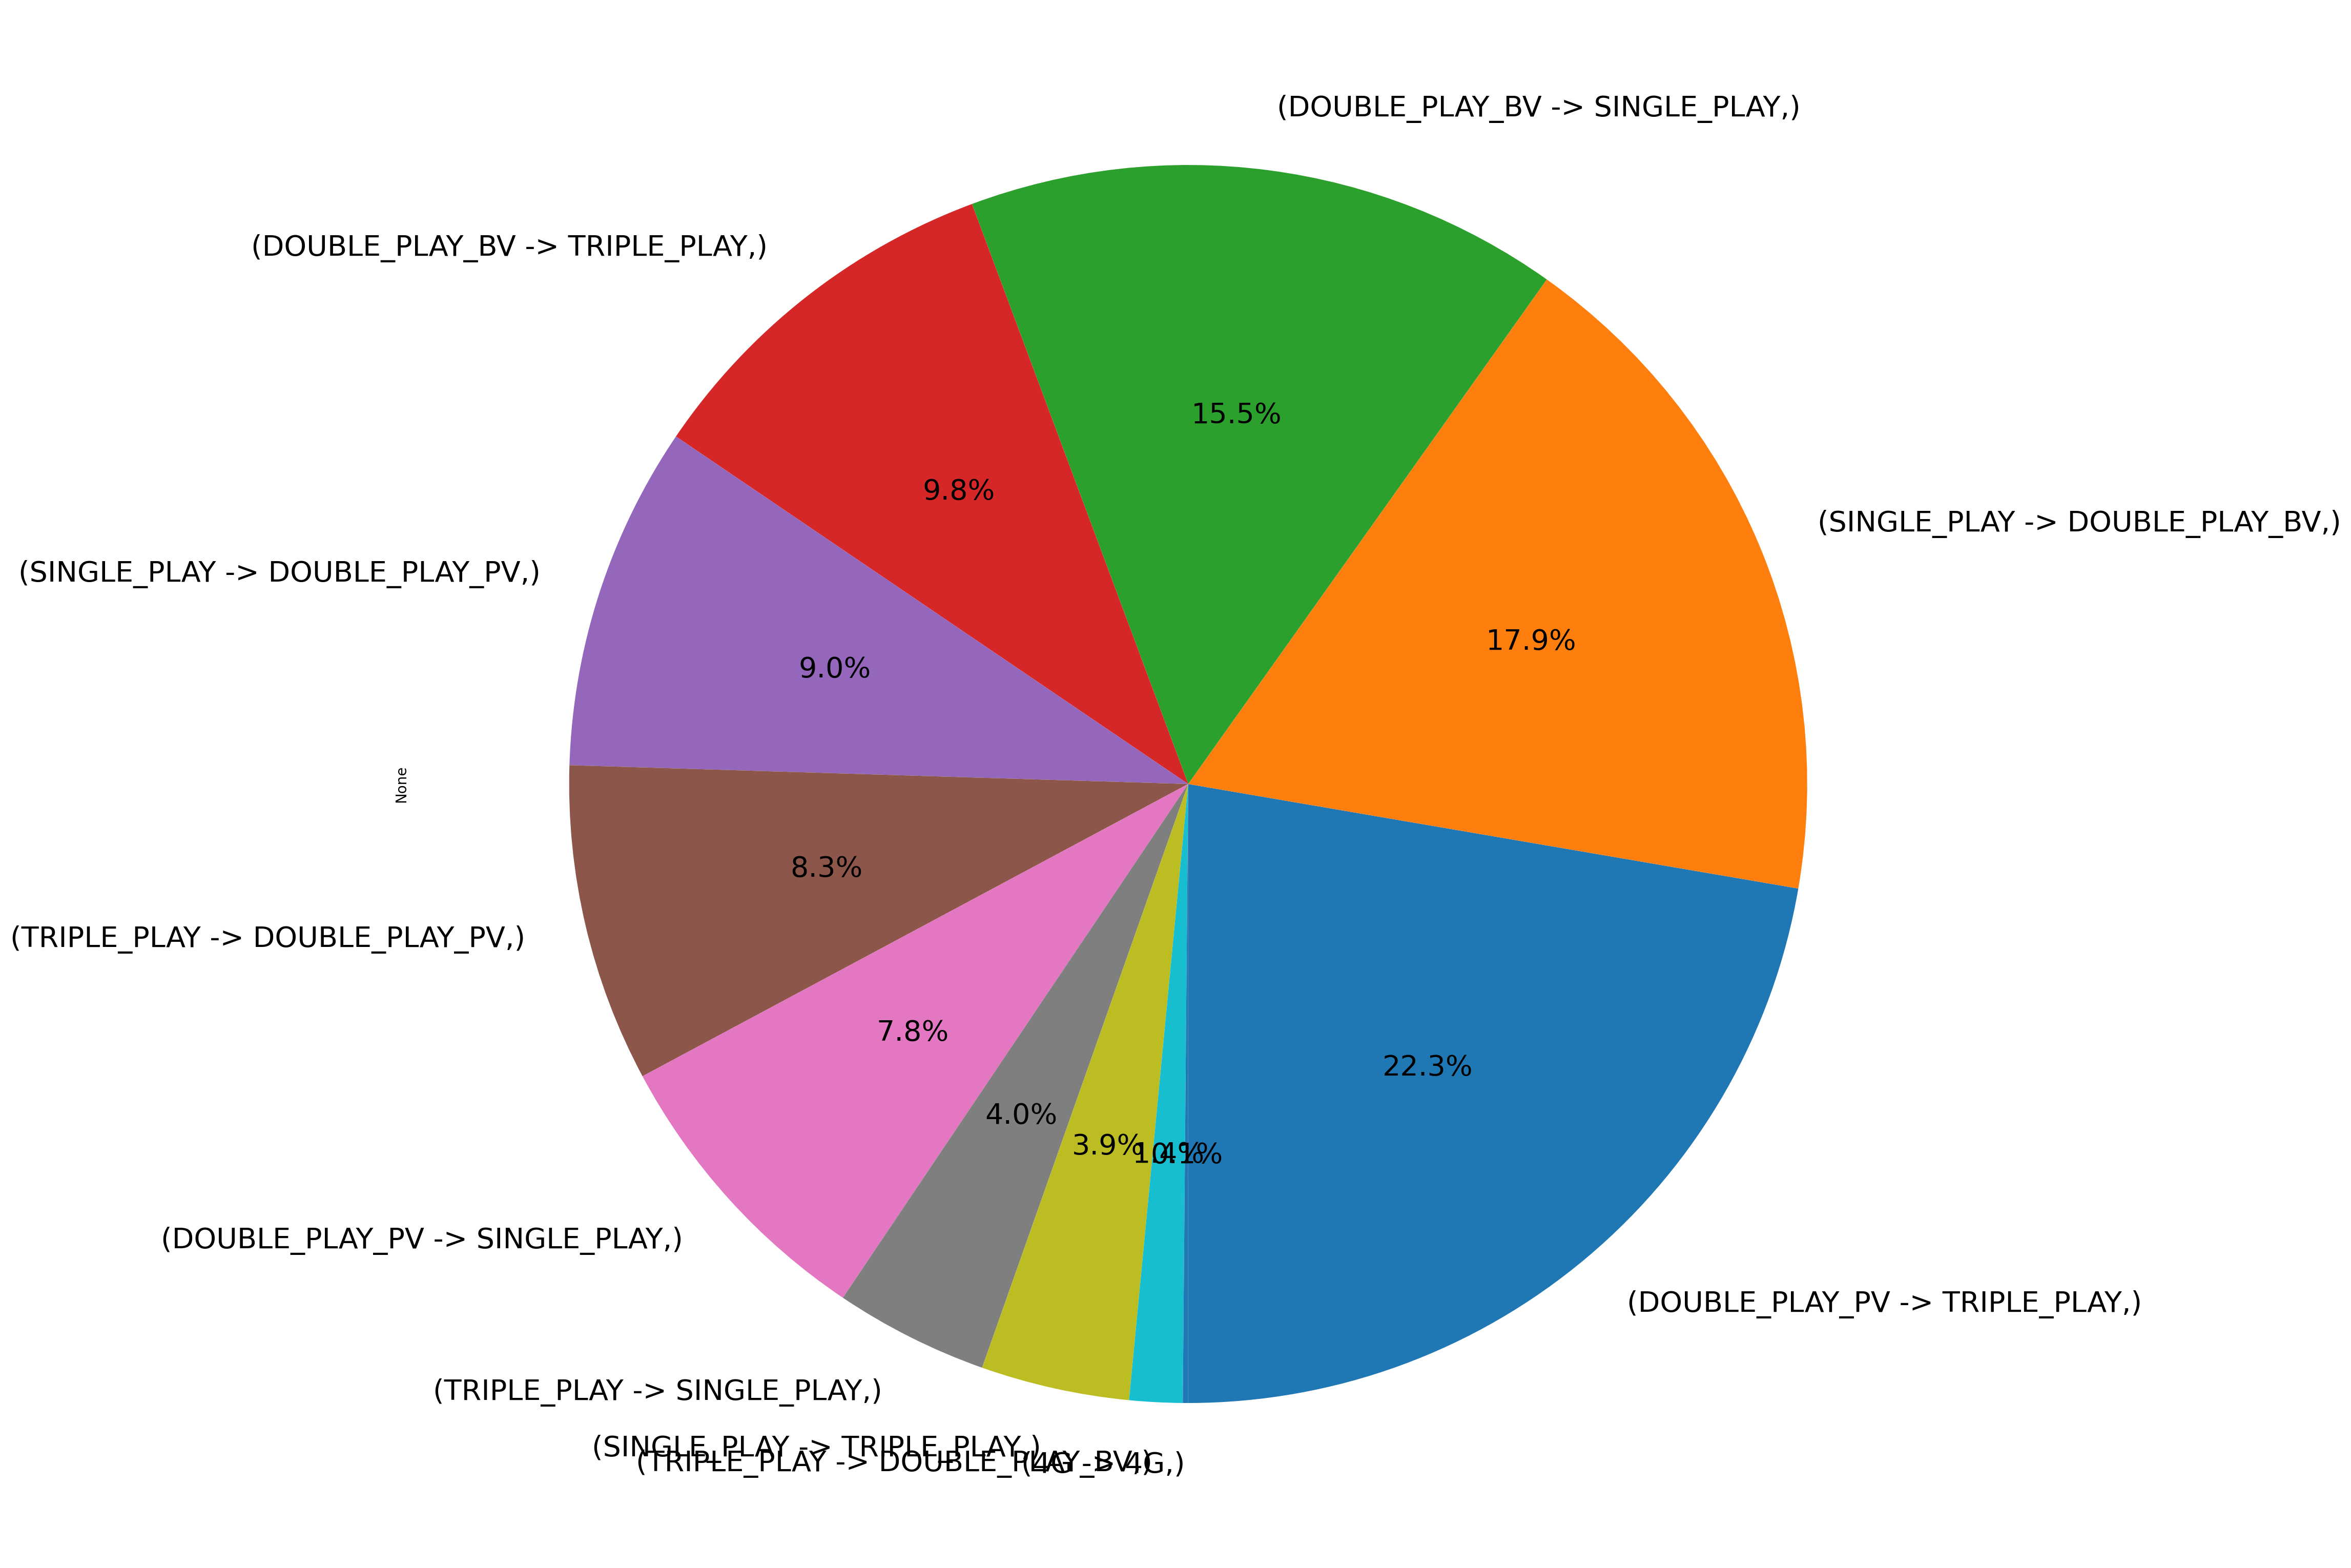

In [148]:
fig = plt.figure(figsize=(20,20), dpi=200)
ax = plt.subplot(111)

voice_udf[["Sub_Update"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=20)

In [149]:
voice_udf.to_csv("data/user_profile/prepared/User_Profile_for_Voice_Analysis.csv")

# Analysis

## Customers with Voice VAS

In [150]:
usage_df.apply(lambda x: "YES" if  type(x["Voice_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     23494
YES     3980
dtype: int64

## Customers with PeoTV VAS

In [151]:
usage_df.apply(lambda x: "YES" if  type(x["Peo_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     18104
YES     9370
dtype: int64

## Customers with BB Vas

In [152]:
usage_df.apply(lambda x: "YES" if  type(x["BB_VAS_Package"]) == str else "NO", axis=1).value_counts()

YES    15454
NO     12020
dtype: int64

## Customers with Uncategorized VAS

In [153]:
usage_df.apply(lambda x: "YES" if  type(x["Other_VAS_Package"]) == str else "NO", axis=1).value_counts()

YES    23355
NO      4119
dtype: int64

## Customers with PeoTV Packages

In [154]:
peo_tv_users = usage_df.apply(lambda x: "YES" if  type(x["Peo_TV_Package"]) == str else "NO", axis=1)
peo_tv_users.value_counts()

NO     26282
YES     1192
dtype: int64

## Customers with at least one product

In [155]:
users_with_products = usage_df.apply(lambda x: "YES" if type(x["Other_VAS_Package"]) == str or type(x["Voice_VAS_Package"]) == str or type(x["Peo_TV_Package"]) == str or type(x["Peo_VAS_Package"]) == str or type(x["BB_VAS_Package"]) == str else "NO", axis=1)
users_with_products.value_counts()

YES    26684
NO       790
dtype: int64